In [16]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import olympus
from olympus import __home__
from olympus.campaigns import Campaign, ParameterSpace
from olympus.datasets import Dataset
from olympus.emulators import Emulator
from olympus.planners import Planner
from olympus.models import BayesNeuralNet

from olympus.objects import (
    ParameterContinuous,ParameterDiscrete,ParameterOrdinal,ParameterCategorical
)


In [7]:
# make continuous parameter ordinal target dataset

df = pd.read_csv(
    f'{__home__}/datasets/dataset_mock_ordinal_emulator/data.csv',
    names=['p3ht_content', 'd1_content', 'd2_content', 'd6_content', 'd8_content', 'conductivity']
)
print(df.shape)
df.head()

(178, 6)


,p3ht_content,d1_content,d2_content,d6_content,d8_content,conductivity
0,75.0,0.0,25.0,0.0,0.0,13.190
1,30.0,0.0,70.0,0.0,0.0,15.560
2,45.0,0.0,55.0,0.0,0.0,14.855
3,90.0,0.0,0.0,10.0,0.0,24.010
4,95.0,0.0,0.0,0.0,5.0,26.190


/home/riley/Software/anaconda3/envs/olympus/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='conductivity', ylabel='Density'>

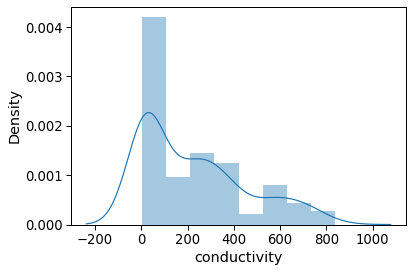

In [8]:
sns.distplot(df['conductivity'])

In [9]:
ordinal_conducts = []
cont_conducts = list(df['conductivity'])
for cont in cont_conducts:
    if 0.<=cont<200.:
        ordinal_conducts.append("not_conductive")
    elif 200.<cont<=600.:
        ordinal_conducts.append("somewhat_conductive")
    else:
        ordinal_conducts.append("very_conductive")

In [11]:
df['conductivity']=ordinal_conducts

In [12]:
df.to_csv(f'{__home__}/datasets/dataset_mock_ordinal_emulator/data.csv', index=False)

In [17]:
dataset = Dataset(kind='mock_ordinal_emulator')
print(dataset.param_space)
print(dataset.value_space)

Continuous (name='p3ht_content', low=15.0, high=96.27, is_periodic=False)
Continuous (name='d1_content', low=0.0, high=60.0, is_periodic=False)
Continuous (name='d2_content', low=0.0, high=70.0, is_periodic=False)
Continuous (name='d6_content', low=0.0, high=85.0, is_periodic=False)
Continuous (name='d8_content', low=0.0, high=75.0, is_periodic=False)
Ordinal (name='conductivity', num_opts: 3, options=['not_conductive', 'somewhat_conductive', 'very_conductive'], order=[0 1 2])


In [ ]:
# build new emulator

model = BayesNeuralNet()